#### Why smoothing is required ?

Smoothing is a done so that we can easily work with the Time series data. 

Time series data when used raw is difficult to build a model and the data will have less stationarity. 

So we can also improve the stationarity of the data by smoothing techniques.

In [8]:
import pandas as pd

In [16]:
df = pd.read_csv('Sales_Quantity_Time_Series.csv')

In [17]:
df.head(10)

,Period,Sales_quantity
0,01.01.2015,12729.0
1,01.02.2015,11636.0
2,01.03.2015,15922.0
3,01.04.2015,15227.0
4,01.05.2015,8620.0
5,01.06.2015,13160.0
6,01.07.2015,17254.0
7,01.08.2015,8642.0
8,01.09.2015,16144.0
9,01.10.2015,18135.0


In [39]:
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams
rcParams['figure.figsize'] = 20,5

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
df['Sales_quantity'] = df['Sales_quantity'].ffill()

In [24]:
df.isnull().sum()

Period            0
Sales_quantity    0
dtype: int64

In [25]:
df.shape

(96, 2)

In [27]:
data = df[:60]['Sales_quantity']

<function matplotlib.pyplot.show(close=None, block=None)>

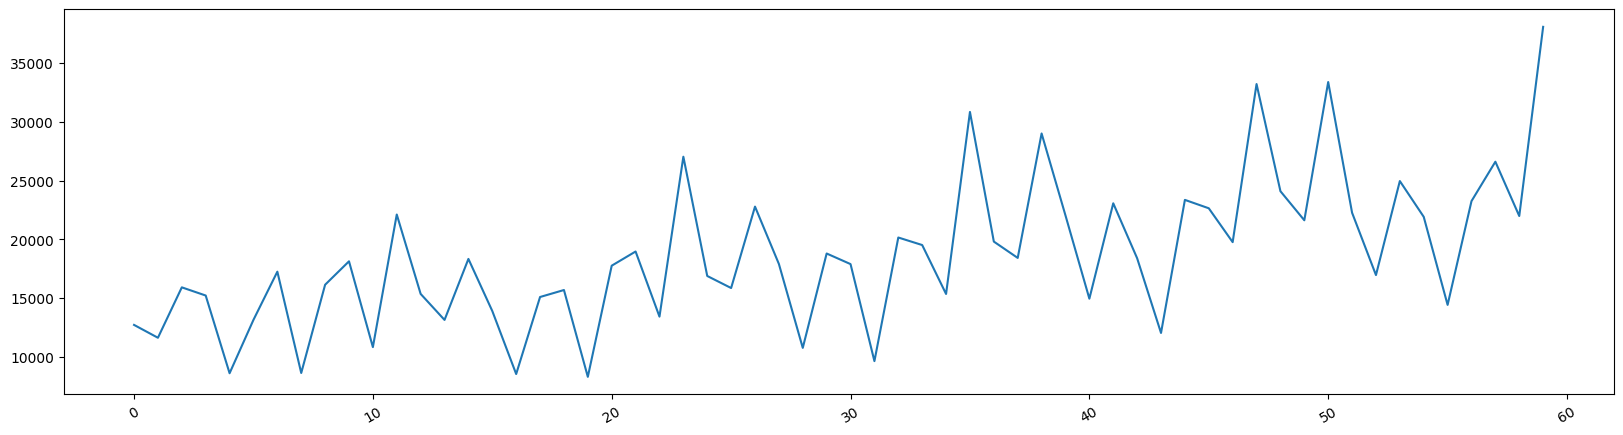

In [40]:
plt.plot(data)
plt.xticks(rotation = 30)
plt.show

## Smoothing using Moving Averages

In [50]:
rollingseries = data.rolling(window = 5)

In [51]:
moving_avg = rollingseries.mean()

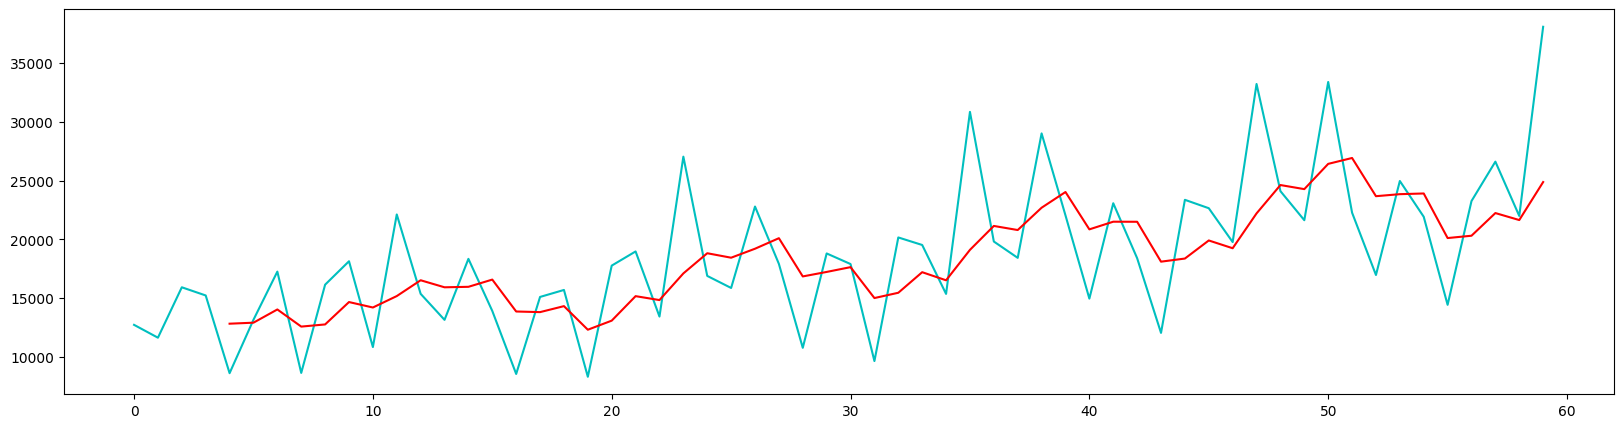

In [58]:
plt.plot(data, color = 'c')
plt.plot(moving_avg, color = 'red')
plt.show()

In [53]:
moving_avg[:10]

0        NaN
1        NaN
2        NaN
3        NaN
4    12826.8
5    12913.0
6    14036.6
7    12580.6
8    12764.0
9    14667.0
Name: Sales_quantity, dtype: float64

In [54]:
rollingseries = data.rolling(window = 10)
moving_avg = rollingseries.mean()

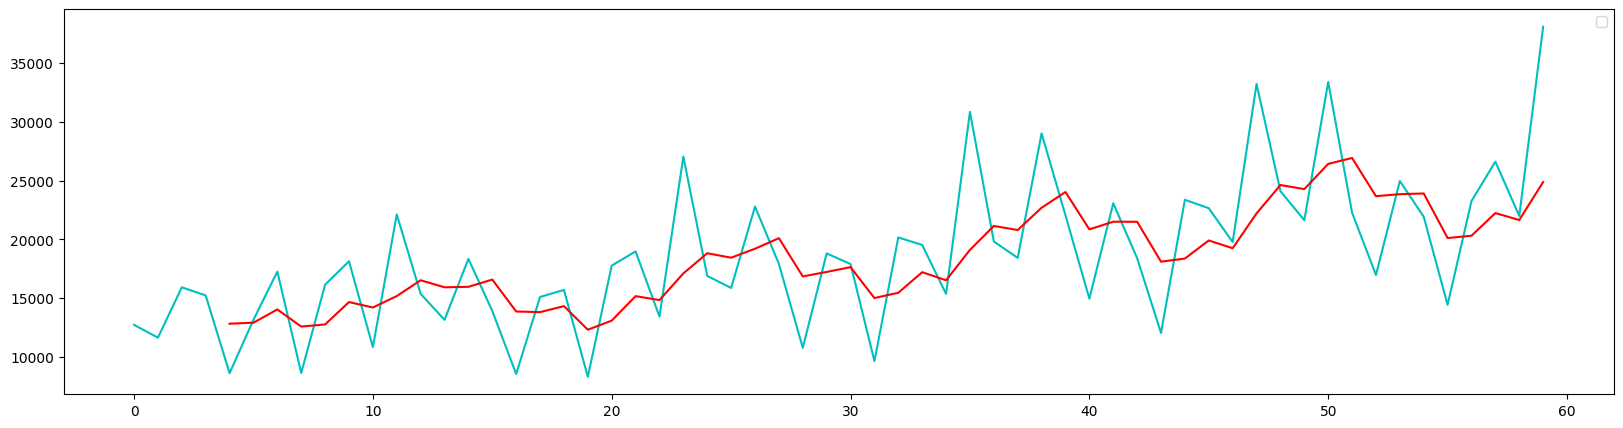

In [57]:
plt.plot(data, color = 'c',)
plt.plot(moving_avg, color = 'red')
plt.legend()
plt.show()

As we increase the window size , the smoothing is also increasing.

## Smoothing using Simple Exponential Smoothing

In [68]:
"""  'smoothting_level' parameter is the weights/alpha given to the most recent data value  """
fit1 = SimpleExpSmoothing(data,).fit(smoothing_level = 0.8, optimized = False)
fit2 = SimpleExpSmoothing(data).fit(smoothing_level = 0.2, optimized = False)
sl_point8 = fit1.fittedvalues
sl_point2= fit2.fittedvalues    ## sl_point2 mean smoothing_level is .2

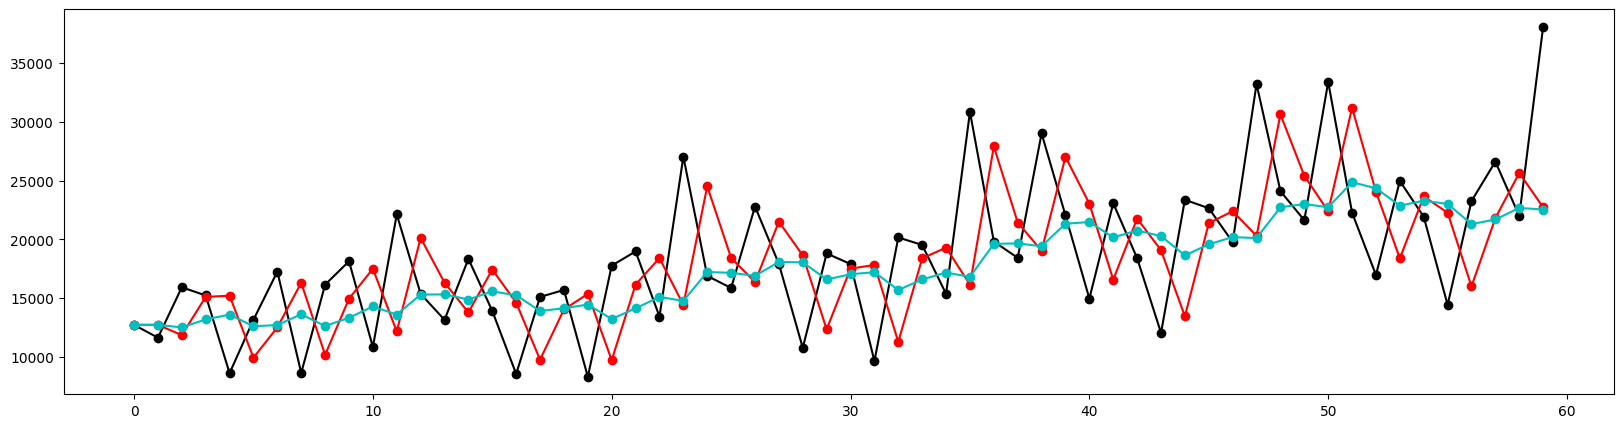

In [70]:
plt.plot(data,  marker = 'o', color = 'black')
plt.plot(sl_point8, marker = 'o', color = 'r')
plt.plot(sl_point2,  marker = 'o', color = 'c')
plt.show()

If we give more weights or alpha value for the most recent data values(here 0.8), then the curve follows the original curve. 

If we give less weights or alpha value for the most recent data values(here 0.2), then the curve will be  less informative.

## Smoothing using Holt(Double Exponential Smoothing)

In [83]:
fit1 = Holt(data).fit()  #no params means I am assuming the trend is linear, meaning additive time series data

fit2 = Holt(data,exponential = True).fit()  #param 'exponential = True' means I assume the curve is exponential.Meaning multiplicative time-series data.

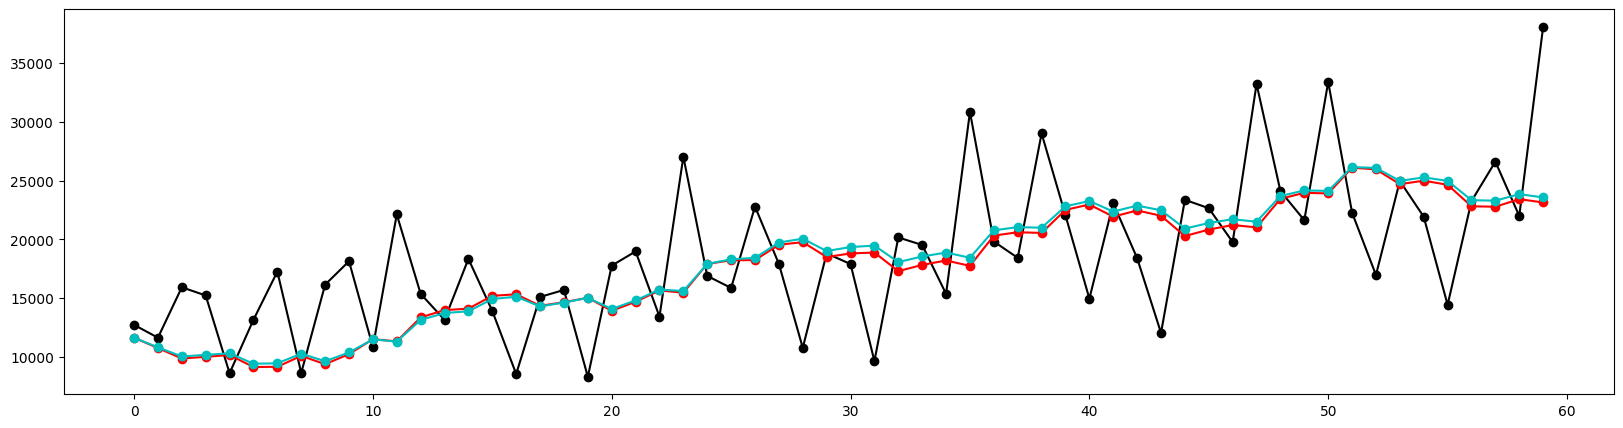

In [84]:
plt.plot(data, marker = 'o', color = 'black')
plt.plot(fit1.fittedvalues, marker = 'o', color = 'r')
plt.plot(fit2.fittedvalues, marker = 'o', color = 'c')
plt.show()

Here the linear trend line and the exponential trend line are almost collinear.